In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv('Data_HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [23]:
# Perform one-hot encoding for 'sales' and 'salary' columns
data_encoded = pd.get_dummies(data, columns=['sales', 'salary'], drop_first=True)

In [24]:
# Check the information and summary statistics of the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std           

In [25]:
# Check for missing values
print(data.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


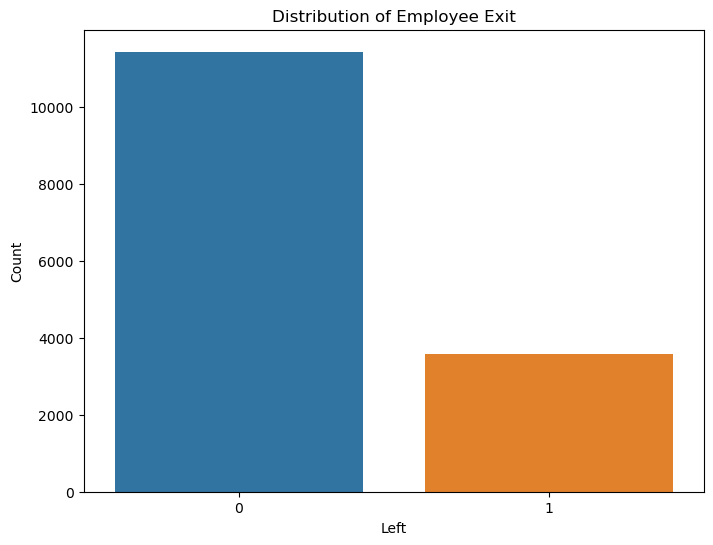

In [26]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data_encoded['left'])
plt.xlabel('Left')
plt.ylabel('Count')
plt.title('Distribution of Employee Exit')
plt.show()

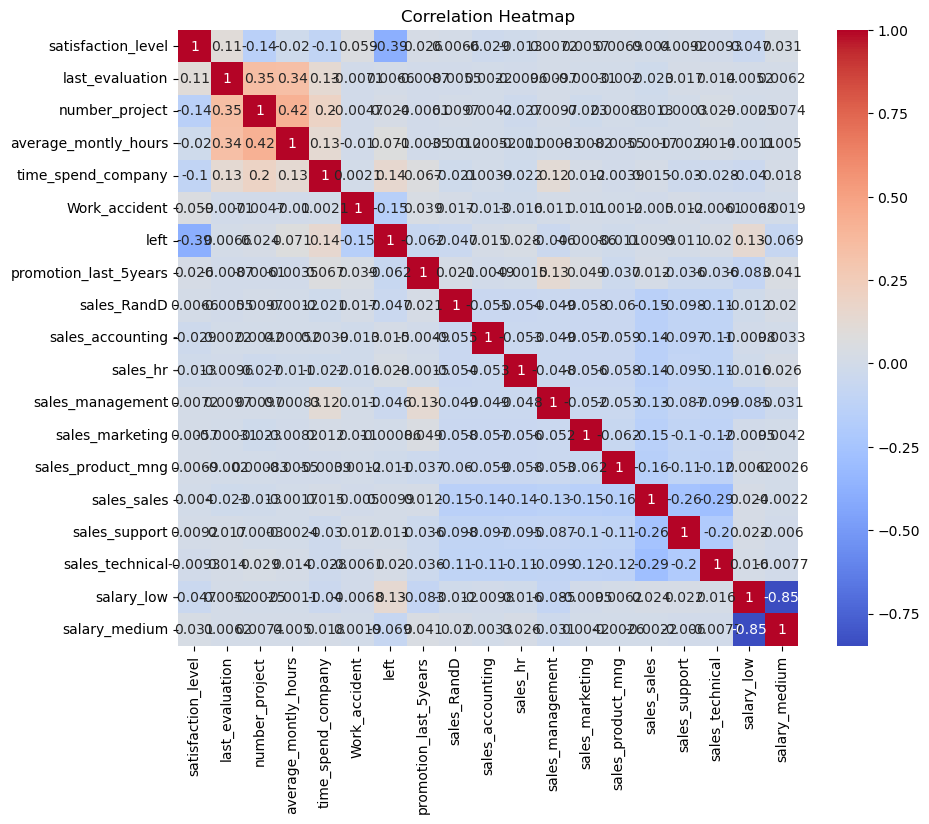

In [27]:
# Visualize the correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

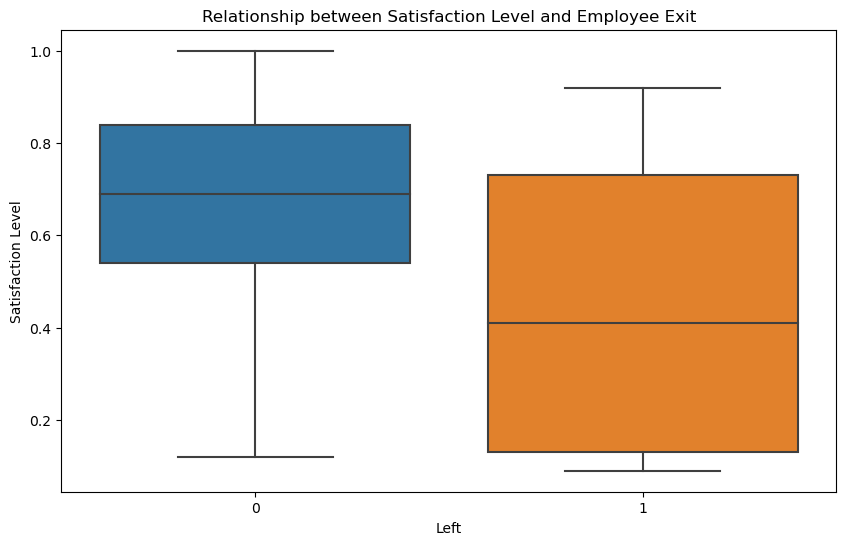

In [28]:
# Visualize the relationship between numeric features and the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='left', y='satisfaction_level', data=data_encoded)
plt.xlabel('Left')
plt.ylabel('Satisfaction Level')
plt.title('Relationship between Satisfaction Level and Employee Exit')
plt.show()

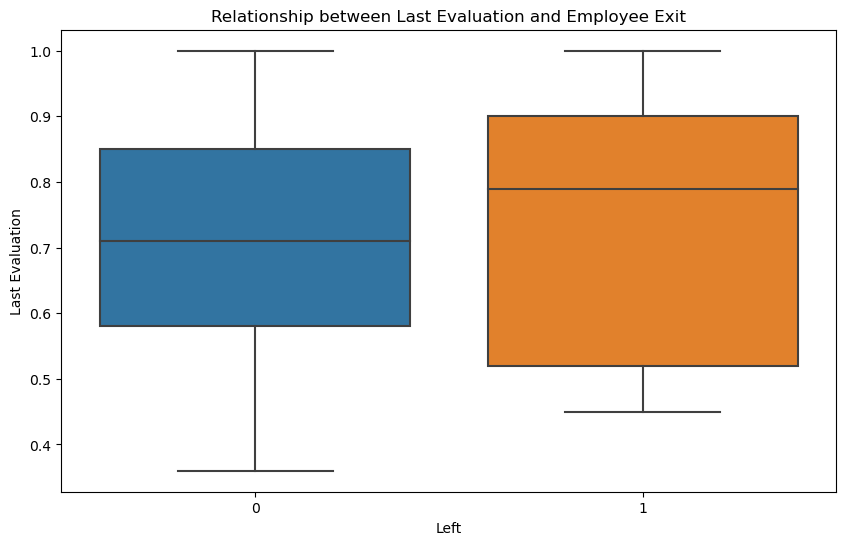

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='left', y='last_evaluation', data=data_encoded)
plt.xlabel('Left')
plt.ylabel('Last Evaluation')
plt.title('Relationship between Last Evaluation and Employee Exit')
plt.show()

In [30]:
# Select features and target variable
X = data_encoded.drop('left', axis=1)
y = data_encoded['left']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
from sklearn.metrics import accuracy_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7963333333333333


In [34]:
# Compare y_pred with y_test
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

      Actual  Predicted
6723       0          0
6473       0          0
4679       0          0
862        1          0
7286       0          0
